In [1]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# Linear Regression (very simple exmaple)

## Data

In [2]:
x_train = np.array([i for i in range(20)])
y_train = 2*x_train + 1

need to reshape the training data so that it is in the shape $N\times m$, where $N$ is the number of samples, $m$ is the dimension of features

In [3]:
x_train = x_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)

also need to make sure the data is in tensor

In [4]:
x_train = torch.tensor(x_train,dtype=torch.float32)
y_train = torch.tensor(y_train,dtype=torch.float32)

## Model 

In [5]:
class Linregre(nn.Module):
    def __init__(self,input_dim,output_dim):
        super(Linregre,self).__init__()
        self.linear = nn.Linear(in_features=input_dim,out_features=output_dim)

    def forward(self,x):
        return self.linear(x)

In [17]:
model = Linregre(1,1)

In [13]:
print(model.linear.weight)
print(model.linear.bias)

Parameter containing:
tensor([[-0.8906]], requires_grad=True)
Parameter containing:
tensor([0.8056], requires_grad=True)


## Train

In [18]:
epoch = 1000
optimizer = torch.optim.SGD(model.parameters(),lr = 0.005)
criterion = nn.MSELoss()

In [19]:
L = []
for _ in range(epoch):
    optimizer.zero_grad()
    pred = model(x_train)
    loss = criterion(pred,y_train)
    L.append(loss.item())
    loss.backward()
    optimizer.step()

## Result

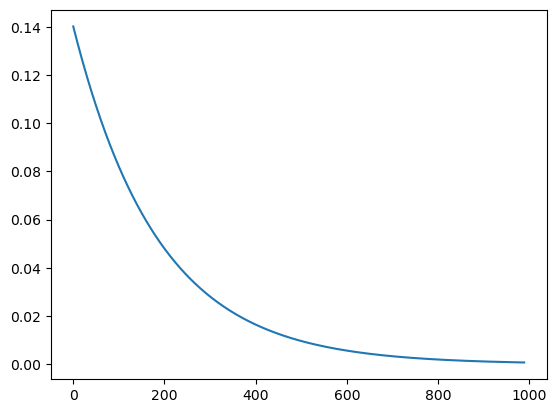

In [23]:
plt.plot(L[10:])

In [25]:
print(model.linear.weight)
print(model.linear.bias)

Parameter containing:
tensor([[2.0039]], requires_grad=True)
Parameter containing:
tensor([0.9492], requires_grad=True)


## Test

In [27]:
x_test = torch.randn((10,1),dtype=torch.float32)
y_true = 2*x_test + 1

In [28]:
y_pred = model(x_test)

In [31]:
print(criterion(y_pred,y_true))


tensor(0.0029, grad_fn=<MseLossBackward0>)
